In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [33]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [35]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [37]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: 2017-08-23


In [47]:
from datetime import timedelta
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - timedelta(days=365)
print(f"The date one year prior to the most recent date: {one_year_ago}")

The date one year prior to the most recent date: 2016-08-23 00:00:00


In [49]:
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()
print(precipitation_data[:5])

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22)]


In [51]:
# Create a DataFrame from the query results
precipitation_df = pd.DataFrame(precipitation_data, columns=["date", "precipitation"])

# Drop any rows with missing values (optional)
precipitation_df = precipitation_df.dropna()

# Convert the "date" column to datetime format for better handling
precipitation_df["date"] = pd.to_datetime(precipitation_df["date"])

# Print the DataFrame to check
print(precipitation_df.head())



        date  precipitation
0 2016-08-24           0.08
1 2016-08-24           2.15
2 2016-08-24           2.28
4 2016-08-24           1.22
5 2016-08-24           2.15


In [53]:
# Sort the DataFrame by date
precipitation_df = precipitation_df.sort_values("date")

# Print the sorted DataFrame
print(precipitation_df.head())


        date  precipitation
0 2016-08-24           0.08
1 2016-08-24           2.15
2 2016-08-24           2.28
4 2016-08-24           1.22
5 2016-08-24           2.15


The date one year prior to the most recent date: 2016-08-23 00:00:00
[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22)]
        date  precipitation
0 2016-08-24           0.08
1 2016-08-24           2.15
2 2016-08-24           2.28
4 2016-08-24           1.22
5 2016-08-24           2.15


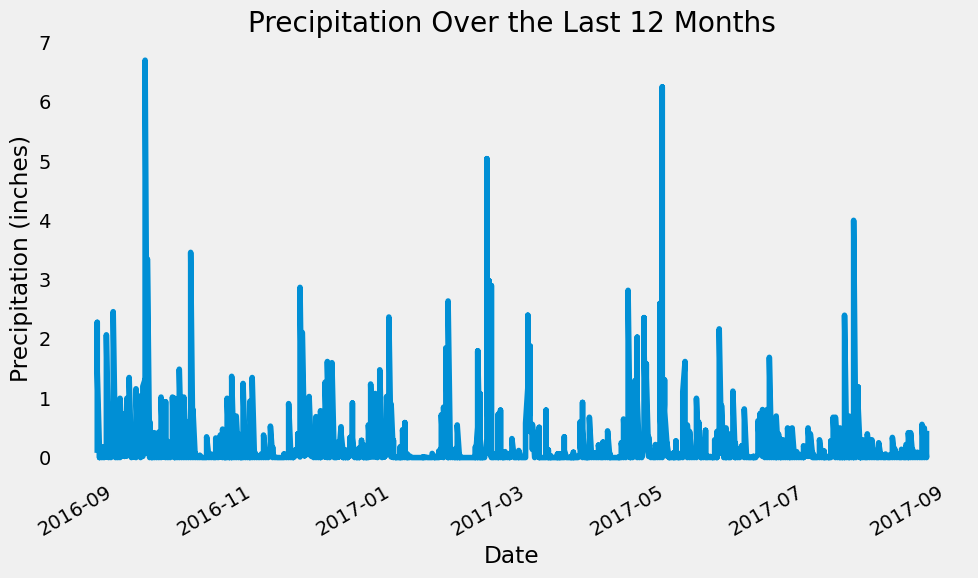

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
from datetime import timedelta

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - timedelta(days=365)
print(f"The date one year prior to the most recent date: {one_year_ago}")

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()
print(precipitation_data[:5])

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation_data, columns=["date", "precipitation"])
precipitation_df = precipitation_df.dropna()
precipitation_df["date"] = pd.to_datetime(precipitation_df["date"])
print(precipitation_df.head())

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x="date", y="precipitation", figsize=(10, 6), title="Precipitation Over the Last 12 Months", legend=False)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.grid()
plt.tight_layout()
plt.show()

In [61]:
precipitation_summary = precipitation_df["precipitation"].describe()
print(precipitation_summary)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = precipitation_df["precipitation"].describe()
print(precipitation_summary)

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [65]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f"The total number of stations in the dataset is: {total_stations}")

The total number of stations in the dataset is: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
for station, count in most_active_stations:
    print(f"Station: {station}, Observations: {count}")

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]  # Assuming the most active station is the first in the list
print(f"The most active station ID is: {most_active_station_id}")
temperature_stats = session.query(
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()
lowest_temp, highest_temp, avg_temp = temperature_stats[0]
print(f"Lowest temperature: {lowest_temp} °F")
print(f"Highest temperature: {highest_temp} °F")
print(f"Average temperature: {avg_temp:.2f} °F")

The most active station ID is: USC00519281
Lowest temperature: 54.0 °F
Highest temperature: 85.0 °F
Average temperature: 71.66 °F


In [77]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]  # Assuming the most active station is the first in the list
print(f"The most active station ID is: {most_active_station_id}")
temperature_stats = session.query(
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()
lowest_temp, highest_temp, avg_temp = temperature_stats[0]
print(f"Lowest temperature: {lowest_temp} °F")
print(f"Highest temperature: {highest_temp} °F")
print(f"Average temperature: {avg_temp:.2f} °F")

The most active station ID is: USC00519281
Lowest temperature: 54.0 °F
Highest temperature: 85.0 °F
Average temperature: 71.66 °F


         date  temperature
0  2016-08-24         77.0
1  2016-08-25         80.0
2  2016-08-26         80.0
3  2016-08-27         75.0
4  2016-08-28         73.0


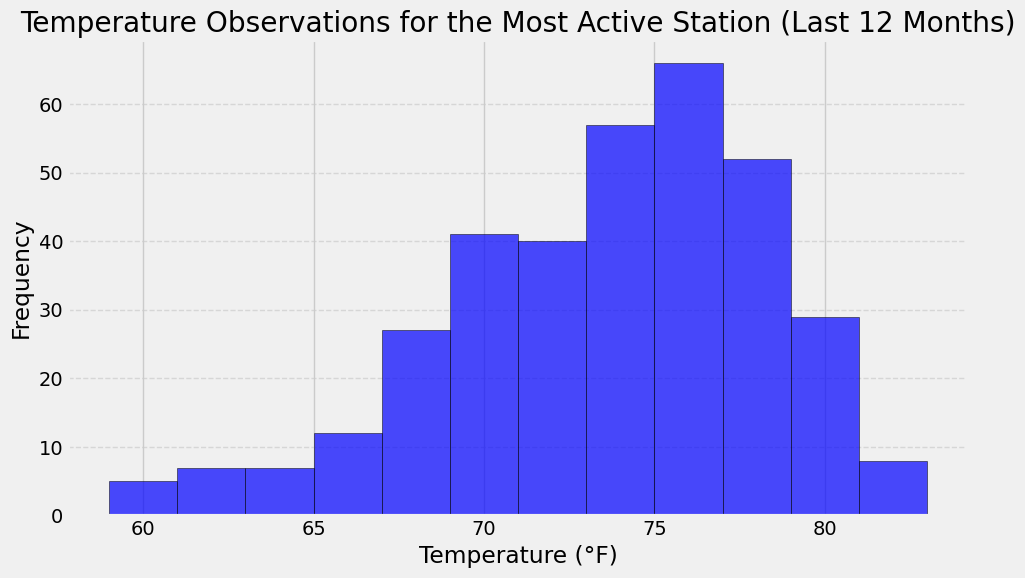

In [83]:
# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Convert the query results into a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=["date", "temperature"])

# Print the DataFrame to check the data
print(temperature_df.head())

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df["temperature"], bins=12, alpha=0.7, color="blue", edgecolor="black")
plt.title("Temperature Observations for the Most Active Station (Last 12 Months)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


         date  temperature
0  2016-08-24         77.0
1  2016-08-25         80.0
2  2016-08-26         80.0
3  2016-08-27         75.0
4  2016-08-28         73.0


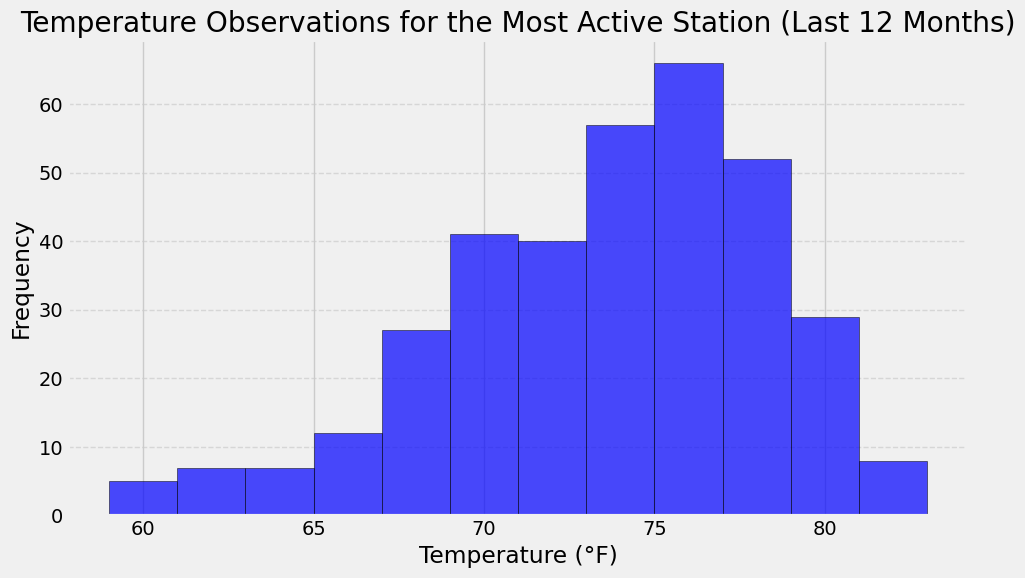

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

temperature_df = pd.DataFrame(temperature_data, columns=["date", "temperature"])
print(temperature_df.head())

plt.figure(figsize=(10, 6))
plt.hist(temperature_df["temperature"], bins=12, alpha=0.7, color="blue", edgecolor="black")
plt.title("Temperature Observations for the Most Active Station (Last 12 Months)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Close Session

In [87]:
# Close Session
session.close()